In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
#Load the data and store the data into a data frame
data = pd.read_csv("TSLA Training.csv",na_values=['null'],index_col='Date')

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-22,23.436001,23.483334,22.133333,22.242001,22.242001,153991500
2018-06-25,22.007999,22.564667,21.833332,22.200666,22.200666,103969500
2018-06-26,22.403334,22.903334,21.719999,22.799999,22.799999,111787500
2018-06-27,23.000000,23.386000,22.633333,22.966667,22.966667,125005500
2018-06-28,23.243999,23.801332,23.073999,23.328667,23.328667,125970000


In [4]:
data.shape

(1257, 6)

In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,147.096224,150.516810,143.380293,147.045863,147.045863,1.364913e+08
std,113.549083,116.105483,110.658665,113.397564,113.397564,8.912683e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,22.677334,23.140667,22.246000,22.635332,22.635332,7.870950e+07
50%,152.639999,155.300003,146.703339,149.919998,149.919998,1.087617e+08
75%,237.283340,241.800003,233.133331,237.036667,237.036667,1.650015e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [6]:
data.isnull().values.any()

False

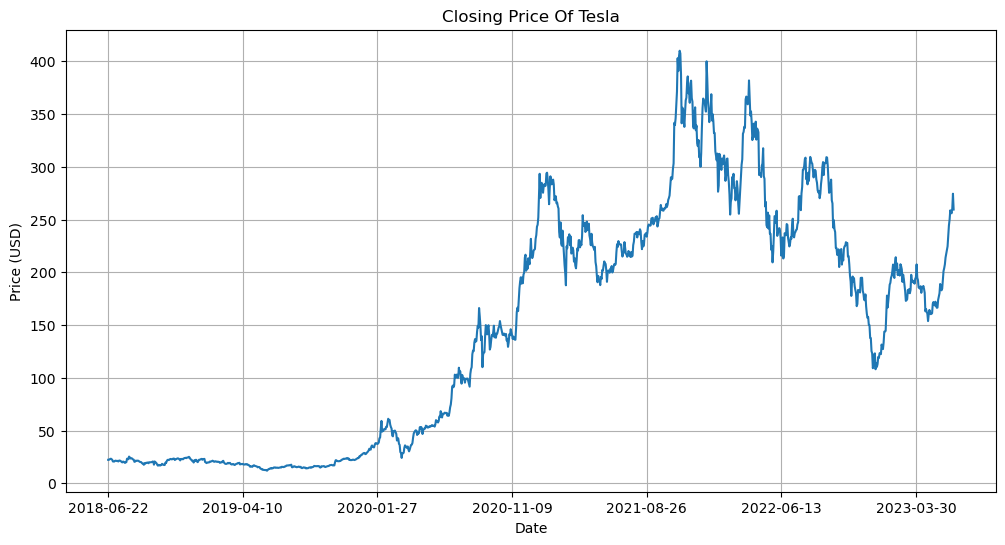

In [7]:
plt.figure(figsize=(12, 6))
#plt.plot(data['Close'])
data['Close'].plot()
plt.title("Closing Price Of Tesla")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

In [8]:
#Plotting moving averages of 100 day
ma100 = data.Close.rolling(100).mean()
ma100

Date
2018-06-22         NaN
2018-06-25         NaN
2018-06-26         NaN
2018-06-27         NaN
2018-06-28         NaN
                ...   
2023-06-14    188.0117
2023-06-15    189.1332
2023-06-16    190.2997
2023-06-20    191.5999
2023-06-21    192.5918
Name: Close, Length: 1257, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

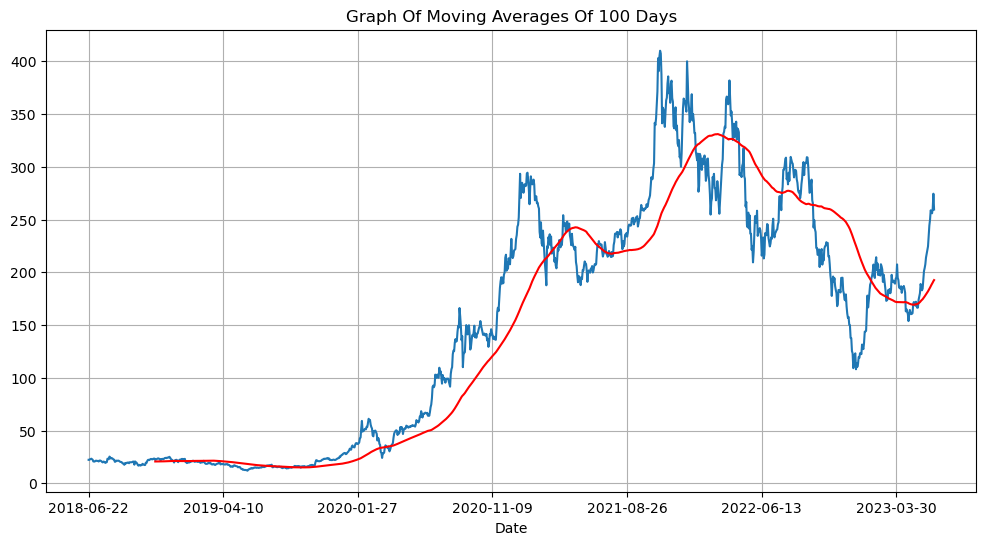

In [9]:
plt.figure(figsize = (12,6))
#plt.plot(data.Close)
data['Close'].plot()
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [10]:
#Defining 200 days moving averages and plotting comparision graph with 100 days moving averages
ma200 = data.Close.rolling(200).mean()
ma200

Date
2018-06-22          NaN
2018-06-25          NaN
2018-06-26          NaN
2018-06-27          NaN
2018-06-28          NaN
                ...    
2023-06-14    196.02555
2023-06-15    195.88095
2023-06-16    195.79515
2023-06-20    195.78935
2023-06-21    195.70085
Name: Close, Length: 1257, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

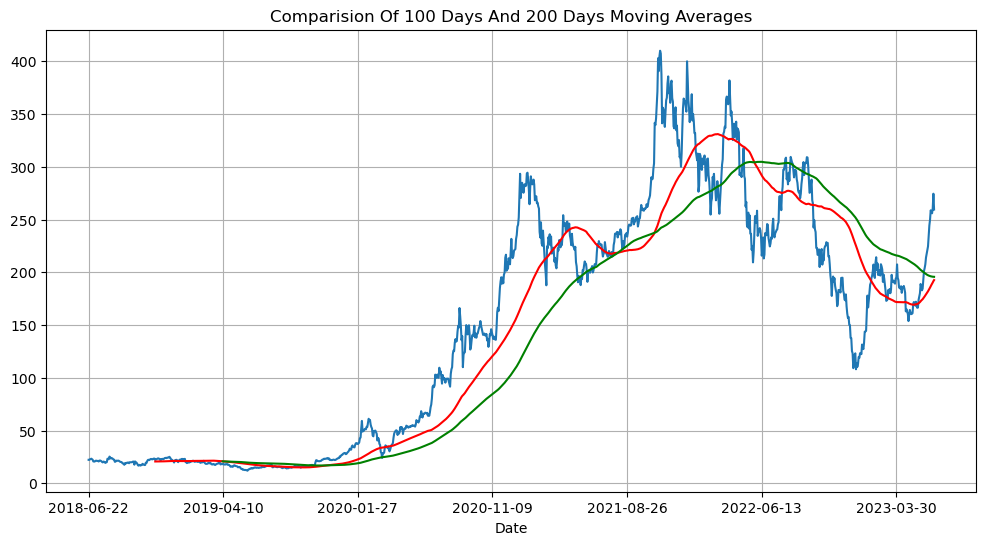

In [11]:
plt.figure(figsize = (12,6))
#plt.plot(data.Close)
data['Close'].plot()
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [12]:
X=data.drop(['Close'],axis=1) # dropping the target column from the data
X=X.drop(['Adj Close'],axis=1)

<Axes: title={'center': 'Correlation with Close'}>

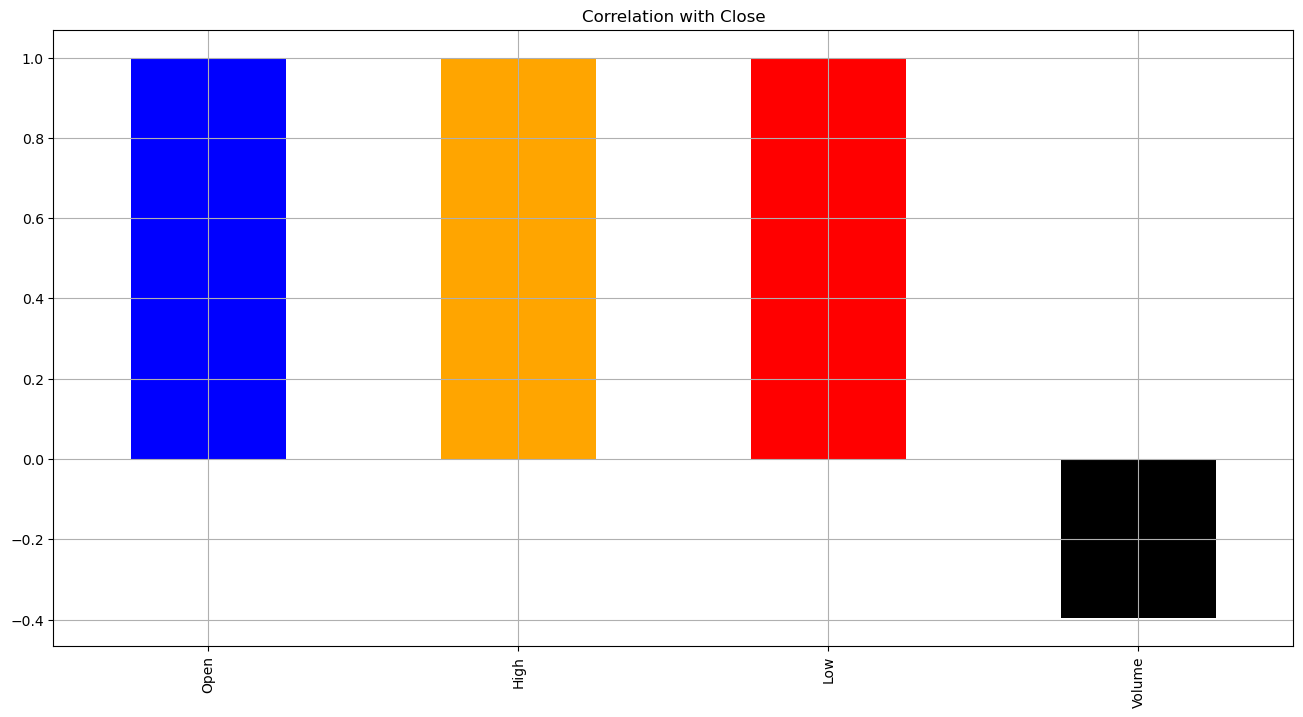

In [13]:
c = ['blue', 'orange', 'red', 'black', 'orange']
X.corrwith(data['Close']).plot.bar(
        figsize = (16, 8), title = "Correlation with Close", fontsize = 10,
        rot = 90, grid = True, color = c)

In [14]:
#Spliting the dataset into training (70%) and testing (30%) set
#Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(879, 6)
(378, 6)


In [15]:
#Using MinMax scaler for normalization of the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [17]:
data_training_array = scaler.fit_transform(train_close)

In [18]:
data_training_array

array([[0.02590368],
       [0.02579984],
       [0.02730555],
       [0.02772428],
       [0.02863374],
       [0.02746467],
       [0.02614486],
       [0.02208998],
       [0.02180525],
       [0.0217617 ],
       [0.02337126],
       [0.02403451],
       [0.02344663],
       [0.02306979],
       [0.02343156],
       [0.02196269],
       [0.02407136],
       [0.02426565],
       [0.02365934],
       [0.02254555],
       [0.02080702],
       [0.01984062],
       [0.02173491],
       [0.02138486],
       [0.01979875],
       [0.01862466],
       [0.01995953],
       [0.02041175],
       [0.02856842],
       [0.02833895],
       [0.02730388],
       [0.03359808],
       [0.03205216],
       [0.02905581],
       [0.02956497],
       [0.02971906],
       [0.02825019],
       [0.02675117],
       [0.02620851],
       [0.02119225],
       [0.02168466],
       [0.02393905],
       [0.0238955 ],
       [0.02363757],
       [0.02409314],
       [0.02349855],
       [0.02225747],
       [0.021

In [19]:
x_train = []
y_train = [] 

for i in range(80, data_training_array.shape[0]):
    x_train.append(data_training_array[i-80: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #adding the batch_size axis
x_train.shape

(799, 80, 1)

In [21]:
#Model building(LSTM)
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu' , return_sequences=False ))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\ghosh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 80, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 80, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 80, 60)              │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 80, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 80, 80)              │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 80, 80)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
#Training the model
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
history = model.fit(x_train, y_train,epochs = 100, batch_size = 32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 266ms/step - loss: 0.0875 - mean_absolute_error: 0.2111
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step - loss: 0.0158 - mean_absolute_error: 0.0910
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 226ms/step - loss: 0.0091 - mean_absolute_error: 0.0626
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step - loss: 0.0093 - mean_absolute_error: 0.0596
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - loss: 0.0060 - mean_absolute_error: 0.0469
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 225ms/step - loss: 0.0054 - mean_absolute_error: 0.0458
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 212ms/step - loss: 0.0059 - mean_absolute_error: 0.0473
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - loss: 0.0068 - mean_absolute_error: 0.0503
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 235ms/step - loss: 0.0051 - mean_absolute_error: 0.0443
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - loss: 0.0053 - mean_absolute_error: 0.0449
Epoch 11/100
25/

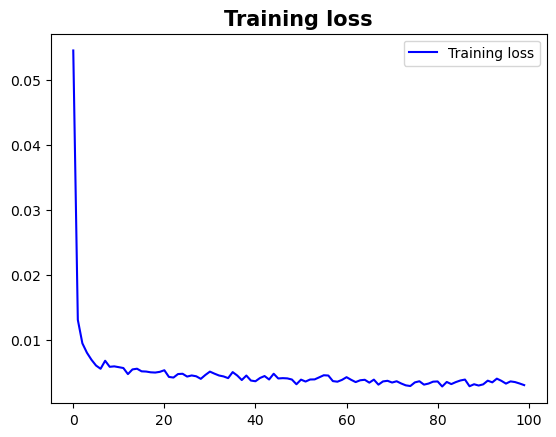

<Figure size 640x480 with 0 Axes>

In [25]:
#plotting loss,it show that loss has decreased significantly any model trained well
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training loss', size=15, weight='bold')
plt.legend(loc=0)
plt.figure()
plt.show()

In [26]:
past_80_days = pd.DataFrame(train_close[-80:])

In [27]:
test_df = pd.DataFrame(test_close)

In [28]:
#Defining the final dataset for testing by including last 80 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.
final_data = pd.concat([past_80_days, test_df], ignore_index=True)

In [29]:
final_data.head()

,0
0,237.066666
1,233.720001
2,237.306671
3,243.636673
4,245.240005


In [30]:
input_data = scaler.fit_transform(final_data)
input_data

array([[0.42722585],
       [0.4161394 ],
       [0.42802091],
       [0.44899021],
       [0.45430154],
       [0.45250165],
       [0.45062446],
       [0.45192742],
       [0.47329423],
       [0.47434324],
       [0.47543643],
       [0.45490887],
       [0.46234032],
       [0.46398559],
       [0.47650753],
       [0.47778846],
       [0.48054901],
       [0.44817305],
       [0.45834302],
       [0.4722121 ],
       [0.47408929],
       [0.49700204],
       [0.51574082],
       [0.50050246],
       [0.50464331],
       [0.49820568],
       [0.49791857],
       [0.50488624],
       [0.5038482 ],
       [0.50623333],
       [0.51822534],
       [0.50925891],
       [0.51638126],
       [0.53159749],
       [0.5375161 ],
       [0.5455108 ],
       [0.57279627],
       [0.60269878],
       [0.59625003],
       [0.59793953],
       [0.62907874],
       [0.646393  ],
       [0.77357801],
       [0.7664778 ],
       [0.78793301],
       [0.83119666],
       [0.87200896],
       [0.976

In [31]:
input_data.shape

(458, 1)

In [32]:
#Testing the model
x_test = []
y_test = []
for i in range(80, input_data.shape[0]):
   x_test.append(input_data[i-80: i])
   y_test.append(input_data[i, 0])

In [33]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(378, 80, 1)
(378,)


In [34]:
#Making prediction and plotting the graph of predicted vs actual values
# Making predictions

y_pred = model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 244ms/step


In [35]:
y_pred

array([[0.7187652 ],
       [0.70517737],
       [0.69107133],
       [0.6782561 ],
       [0.6719633 ],
       [0.6787048 ],
       [0.7005953 ],
       [0.7329152 ],
       [0.76749915],
       [0.7963694 ],
       [0.815301  ],
       [0.83403975],
       [0.85178685],
       [0.86248857],
       [0.86366224],
       [0.85518444],
       [0.84208745],
       [0.82762045],
       [0.8162386 ],
       [0.8061293 ],
       [0.79730487],
       [0.7889509 ],
       [0.7793727 ],
       [0.76857024],
       [0.7552771 ],
       [0.7393169 ],
       [0.7214113 ],
       [0.7035959 ],
       [0.684213  ],
       [0.6635678 ],
       [0.6452909 ],
       [0.63263524],
       [0.6261346 ],
       [0.6240676 ],
       [0.62630856],
       [0.63110393],
       [0.6376179 ],
       [0.6454566 ],
       [0.6523225 ],
       [0.6546876 ],
       [0.65267354],
       [0.64956224],
       [0.6476841 ],
       [0.64571834],
       [0.6418898 ],
       [0.6342778 ],
       [0.6218179 ],
       [0.606

In [36]:
y_pred.shape

(378, 1)

In [37]:
y_test

array([0.67166879, 0.63563789, 0.67824998, 0.75592145, 0.82011017,
       0.84985811, 0.84381798, 0.84130031, 0.82379832, 0.80882502,
       0.9667296 , 0.91130836, 0.84343149, 0.81757046, 0.77589693,
       0.81030465, 0.81723917, 0.86341799, 0.78097636, 0.80090766,
       0.77981689, 0.74132352, 0.74200814, 0.68417972, 0.66883095,
       0.6560219 , 0.67701329, 0.55741435, 0.57646228, 0.67625133,
       0.6702112 , 0.64195401, 0.62592063, 0.66145475, 0.64380911,
       0.65999716, 0.67103937, 0.64072834, 0.59153495, 0.60893767,
       0.66047191, 0.66153199, 0.60958913, 0.58820023, 0.5490553 ,
       0.48557324, 0.52613158, 0.53618003, 0.60305211, 0.59636043,
       0.61349807, 0.56866643, 0.56756217, 0.53033865, 0.55222443,
       0.59039764, 0.56757319, 0.52014665, 0.48814611, 0.52736828,
       0.56970438, 0.60434401, 0.64165588, 0.65906962, 0.73947944,
       0.74514421, 0.76149776, 0.75787592, 0.84753919, 0.85607495,
       0.84991331, 0.83181506, 0.83953357, 0.90673694, 0.84689

In [38]:
scaler.scale_

array([0.00331268])

In [39]:
scale_factor = 1/0.00331268
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

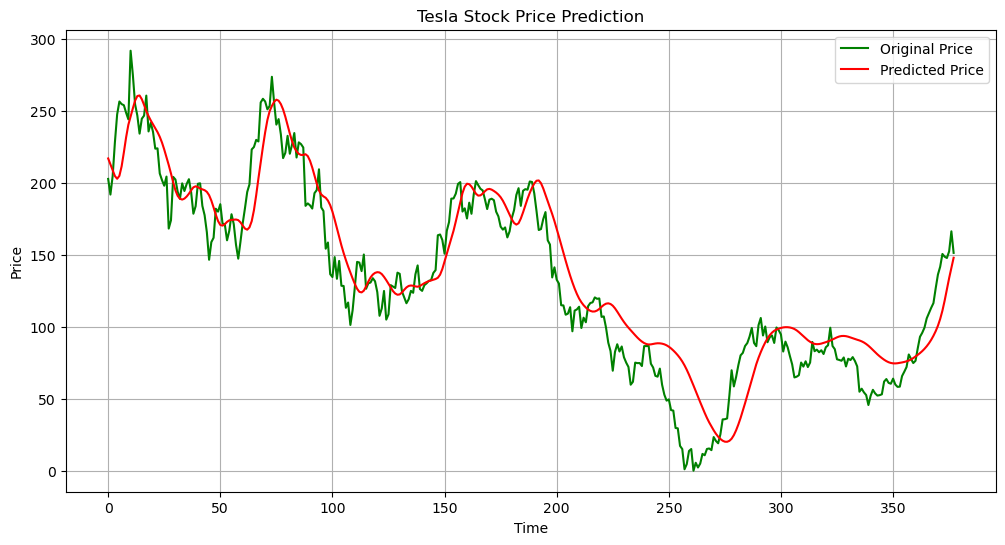

In [40]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'g', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
predictions = model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


In [42]:
#Model evaluation
#Calculation of mean absolute error

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 80
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 11.44%


In [43]:
# Calculate Mean Squared Error and R2 Score
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 551.9369073029089


In [44]:
Pred = model.predict(x_test)
Pred = scaler.inverse_transform(Pred)
RMSE = np.sqrt(np.mean(Pred - y_test)**2)
RMSE

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


114.94904990219597

In [45]:
#Calculation of R2 score

from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.8682239073635637


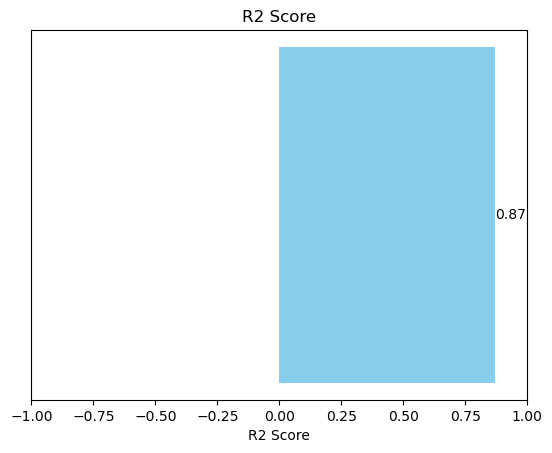

In [46]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

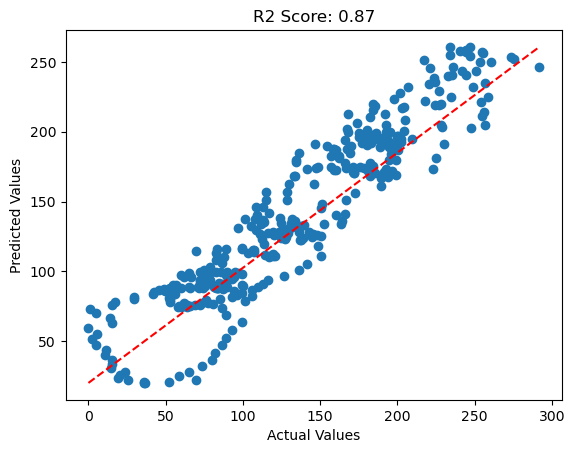

In [47]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()

In [49]:
# Predict future values for 30 days
future_input = input_data[-80:]
future_predictions = []
for _ in range(30):
    future_input = future_input.reshape((1, future_input.shape[0], future_input.shape[1]))
    future_pred = model.predict(future_input)
    future_predictions.append(future_pred[0][0])
    future_input = np.append(future_input[0][1:], future_pred).reshape(-1, 1) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━

In [50]:
# Inverse transform the future predictions
future_predictions = np.array(future_predictions) * scale_factor

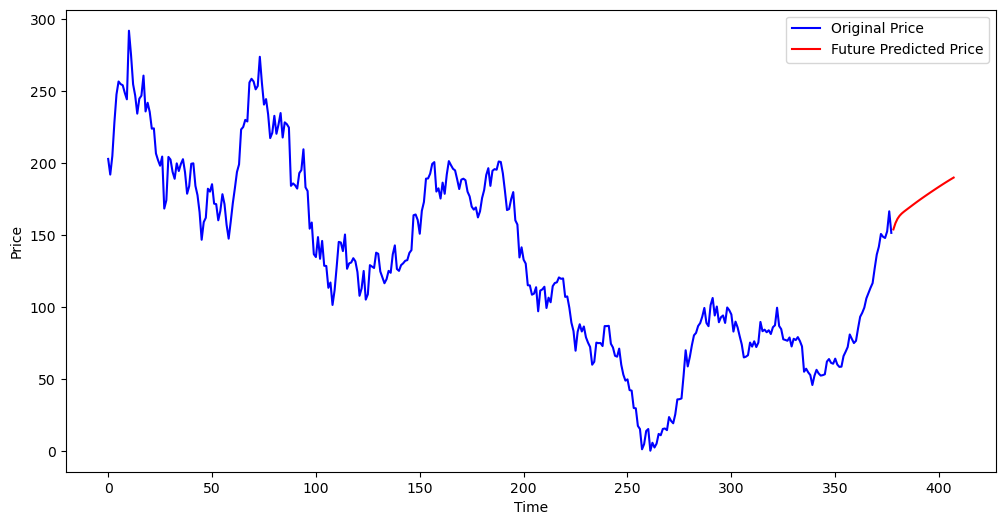

In [51]:
# Plotting the future predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, 'b', label="Original Price")
plt.plot(range(len(y_test), len(y_test) + 30), future_predictions, 'r', label="Future Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()